In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics
!pip install termcolor
from termcolor import colored as cl
import seaborn as sns
%matplotlib inline

You should consider upgrading via the '/Users/derp/jupyter/bin/python -m pip install --upgrade pip' command.


In [91]:
df=pd.read_csv('/Users/derp/Downloads/PortfolioProjects/housingdata/NashvilleHousing_Cleaned.csv')

In [92]:
df.head()


,UniqueID,ParcelID,LandUse,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,SaleDateConverted,PropertySplitAddress,PropertySplictCity,OwnerSplitAddress,OwnerSplictCity,OwnerSplictState
0,2045,007 00 0 125.00,SINGLE FAMILY,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE",2.3,50000.0,168200.0,...,1986.0,3.0,3.0,0.0,2013-04-09,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE",3.5,50000.0,264100.0,...,1998.0,3.0,3.0,2.0,2014-06-10,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE",2.9,50000.0,216200.0,...,1987.0,4.0,3.0,0.0,2016-09-26,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.",2.6,50000.0,147300.0,...,1985.0,3.0,3.0,0.0,2016-01-29,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.",2.0,50000.0,152300.0,...,1984.0,4.0,3.0,0.0,2014-10-10,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN


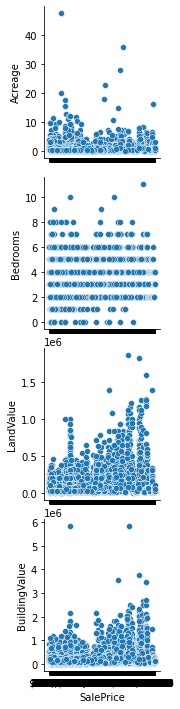

In [70]:
##df.columns = ['SalePrice', 'Acreage', 'YearBuilt', 'Bedrooms', 'LandValue', 'BuildingValue' ]
##df.head()
##sns.pairplot(df)

sns.pairplot(data=df,
                  x_vars=['SalePrice'],
                  y_vars=['Acreage', 'Bedrooms', 'LandValue', 'BuildingValue'])

In [71]:
print(df.corr())

               UniqueID   Acreage  LandValue  BuildingValue  TotalValue  \
UniqueID       1.000000  0.004745  -0.058441      -0.064508   -0.068610   
Acreage        0.004745  1.000000   0.324350       0.222900    0.287369   
LandValue     -0.058441  0.324350   1.000000       0.617770    0.824068   
BuildingValue -0.064508  0.222900   0.617770       1.000000    0.954035   
TotalValue    -0.068610  0.287369   0.824068       0.954035    1.000000   
YearBuilt      0.009134  0.019108  -0.015810       0.208028    0.142111   
Bedrooms      -0.036037  0.155813   0.348330       0.448604    0.454961   
FullBath      -0.051810  0.221249   0.544062       0.647215    0.672197   
HalfBath      -0.019364  0.054709   0.189032       0.378268    0.343276   

               YearBuilt  Bedrooms  FullBath  HalfBath  
UniqueID        0.009134 -0.036037 -0.051810 -0.019364  
Acreage         0.019108  0.155813  0.221249  0.054709  
LandValue      -0.015810  0.348330  0.544062  0.189032  
BuildingValue   0.208

In [93]:
##df[["Bedrooms", "Acreage"]] = df[["Bedrooms", "Acreage"]].apply(pd.to_int)

df.dropna(inplace = True)

print(cl(df.isnull().sum(), attrs = ['bold']))

UniqueID                0
ParcelID                0
LandUse                 0
SalePrice               0
LegalReference          0
SoldAsVacant            0
OwnerName               0
Acreage                 0
LandValue               0
BuildingValue           0
TotalValue              0
YearBuilt               0
Bedrooms                0
FullBath                0
HalfBath                0
SaleDateConverted       0
PropertySplitAddress    0
PropertySplictCity      0
OwnerSplitAddress       0
OwnerSplictCity         0
OwnerSplictState        0
dtype: int64


In [97]:
#df.replace(',','', regex=True, inplace=True)
#c = df.select_dtypes(object).columns
#df[c] = df[c].apply(pd.to_numeric,errors='coerce')



In [89]:
#df.dropna

<bound method DataFrame.dropna of        UniqueID  ParcelID  LandUse  SalePrice  LegalReference  SoldAsVacant  \
0          2045       NaN      NaN   240000.0             NaN           NaN   
1         16918       NaN      NaN   366000.0             NaN           NaN   
2         54582       NaN      NaN   435000.0             NaN           NaN   
3         43070       NaN      NaN   255000.0             NaN           NaN   
4         22714       NaN      NaN   278000.0             NaN           NaN   
...         ...       ...      ...        ...             ...           ...   
54106     51558       NaN      NaN   258000.0             NaN           NaN   
54107     34115       NaN      NaN   339528.0             NaN           NaN   
54108     20731       NaN      NaN   230000.0             NaN           NaN   
54109     23447       NaN      NaN   237900.0             NaN           NaN   
54110     23448       NaN      NaN   259000.0             NaN           NaN   

       OwnerName 

In [49]:
####price_data = df[['Acreage', 'Bedrooms', 'LandValue', 'BuildingValue']].values
####price_target = df[['SalePrice']].values
####price_data_names = ['Acreage', 'Bedrooms', 'LandValue', 'BuildingValue']

####X,y = scale(price_data), price_target

####LinReg = LinearRegression(normalize=True)
####LinReg.fit(X,y)
####print(LinReg.score(X,y))

In [59]:
## check for missing values
##missing_values = x==np.NAN
##print(x(missing_values==True))

TypeError: 'numpy.ndarray' object is not callable

In [58]:
## change data type from float to int
##df['Acreage'] = pd.to_numeric(df['Acreage'], errors = 'coerce')
##df['Acreage'] = df['Acreage'].astype('int64')

##print(cl(df.dtypes, attrs = ['bold']))

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [114]:
##df = df.replace(',','', regex=True)
df = df.replace(',', '').replace('$', '')
#df['Avg_Annual'] = df['Avg_Annual'].astype(int)


X = df[['Acreage', 'Bedrooms', 'LandValue', 'BuildingValue']].values
y = df[['SalePrice']].values

print(df)


       UniqueID         ParcelID        LandUse SalePrice    LegalReference  \
0          2045  007 00 0 125.00  SINGLE FAMILY    240000  20130412-0036474   
1         16918  007 00 0 130.00  SINGLE FAMILY    366000  20140619-0053768   
2         54582  007 00 0 138.00  SINGLE FAMILY    435000  20160927-0101718   
3         43070  007 00 0 143.00  SINGLE FAMILY    255000  20160129-0008913   
4         22714  007 00 0 149.00  SINGLE FAMILY    278000  20141015-0095255   
...         ...              ...            ...       ...               ...   
54106     51558  180 00 0 081.00  SINGLE FAMILY    258000  20160712-0071418   
54107     34115  180 00 0 085.00  SINGLE FAMILY    339528  20150804-0077423   
54108     20731  180 00 0 094.00  SINGLE FAMILY    230000  20140905-0081621   
54109     23447  180 00 0 114.00  SINGLE FAMILY    237900  20141125-0108837   
54110     23448  180 00 0 230.00  SINGLE FAMILY    259000  20141203-0110910   

      SoldAsVacant                           OwnerN

In [135]:
#df['SalePrice'] = df['SalePrice'].str.replace(',', '')
#df['SalePrice'] = df['SalePrice'].str.replace('$', '')
#df['SalePrice'] = df['SalePrice'].astype(int)

##df['SalePrice'] = df['SalePrice'].replace('$', '')
##df['BuildingValue'] = df['BuildingValue'].replace('$', '')
##df['LandValue'] = df['LandValue'].replace('$', '')

df[X] = df[X].replace({'\$': '', ',': ''}, regex=True)
df[y] = df[y].replace({'\$': '', ',': ''}, regex=True)

KeyError: "None of [Index([  (2.3, 3.0, 50000.0, 168200.0),   (3.5, 3.0, 50000.0, 264100.0),\n         (2.9, 4.0, 50000.0, 216200.0),   (2.6, 3.0, 50000.0, 147300.0),\n         (2.0, 4.0, 50000.0, 152300.0),   (2.0, 3.0, 50000.0, 190400.0),\n        (1.03, 3.0, 40000.0, 137900.0),  (1.03, 3.0, 40000.0, 157900.0),\n        (1.67, 3.0, 45400.0, 176900.0),   (1.3, 5.0, 40000.0, 179600.0),\n       ...\n        (0.29, 3.0, 25000.0, 102800.0),  (0.26, 3.0, 25000.0, 111800.0),\n         (0.23, 3.0, 25000.0, 95000.0),  (0.23, 3.0, 25000.0, 159300.0),\n        (3.0, 4.0, 111000.0, 140400.0),  (3.0, 4.0, 111000.0, 155800.0),\n        (3.0, 3.0, 111000.0, 141700.0), (3.03, 3.0, 111500.0, 210400.0),\n        (1.03, 3.0, 59000.0, 104100.0),  (0.46, 3.0, 59000.0, 194000.0)],\n      dtype='object', length=23678)] are in the [columns]"

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [137]:
LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.intercept_, LinReg.coef_)

ValueError: could not convert string to float: '$120000 '

NameError: name 'linear_model' is not defined